<a id='top'></a>

# CSCI3022 F21
# Homework 2: Visualizing and Processing Data
***

**Name**: Olivia Golden

***

This assignment is due on Canvas (as .ipynb) and Gradescope (as a .pdf) by **MIDNIGHT on Mon 13 Sep**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) |
---

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline



[Back to top](#top)
<a/ id='p1'></a>

## (20 pts) Problem 1: Computation (Streaming Means)
***

Data science is often divided into two categories: questions of *what* the best value might be to repreesnt a data problem, and questions of *how* to compute that data value.  Question 1 - and prior lectures - should tell you that computing the mean is valuable!  But *how* do we compute the mean?

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 
<a id='eq1'></a>
$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2 \qquad \tag{Equation 1}
$$

**Part A**:

How many computations - floating point operations: addition, subtraction, multiplication, division each count as 1 operation - are required to compute the mean of the data set with $n$ observations?


It takes n operations.  n-1 operations to sum up the set with n observations and then an additional operation to divide by n.

**Part B**:

Now suppose our data is *streaming*- we slowly add observations one at a time, instead of seeing the entire data set at once.  We are still interested in the mean, so if we stream the data set `[4,6,0,10, ...]`, we first compute the mean of the the first data point `[4]`, then we recompute the mean of the first two points `[4,6]`, then we recompute the mean of three `[4,6,0]`, and so forth.

Suppose we recompute the mean from scratch after each and every one of our $n$ observations are one-by-one added to our data set.  How many floating point operations are spent computing (and re-computing) the mean of the data set?

It takes $\sum_{k=1}^{n} k$ operations.

We should be convinced that streaming a mean costs a lot more computer time than just computing once!

In this problem we explore a smarter method for such an _online_ computation of the mean.  

**Result**: The following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$


A proof of this result is in the [Appendix](#Appendix) after this problem, and requires some careful manipulations of the sum $\bar{x}_n$.  Your task will be to computationally verify and utilize this result.

**Part C**: Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class ([Equation 1](#eq1)). Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class ([Equation 1](#eq1)). You may **not** use any built-in sample mean or variance functions.

In [18]:
#Solution:
def my_sample_mean(array):
    return sum(array)/len(array) #sum up array and divide by length

def my_sample_var(array):
    var=0 #start sum at 0
    mean=my_sample_mean(array) #calculate mean using previous func
    for i in range(len(array)): 
        var=var+(array[i]-mean)**2 #sum up (array - mean)^2
    return var/(len(array)-1) #divide by n-1

**Part D**: Use your functions from Part C to compute the sample mean and sample variance of the following array, which contains the minutes late that the BuffBus is running on Friday afternoon.

`bus = [312, 4, 10, 0, 22, 39, 81, 19, 8, 60, 80, 42,12,1]`

In [19]:
bus = [312, 4, 10, 0, 22, 39, 81, 19, 8, 60, 80, 42, 12, 1]
print(my_sample_mean(bus))
print(my_sample_var(bus))

49.285714285714285
6488.681318681319


**Part E**: Implement a third function called `update_mean` that implements the formula discussed after part B. Note that this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$, and returns $\bar{x}_{n}$. A function header and return statement are provided for you. This function may be auto-graded, so please do not change the given header API - the order of inputs matters! If you change it, you might lose points.

Use this function to compute the values that you get from taking the mean of the first buff buses' lateness, the first two buff buses' lateness, the first three buff buses' lateness, and so on up to all of the `bus` data points from **Part D**. Store your streaming bus means in a numpy array called `buffbus_bad_means`.  Report all 12 estimates in `buffbus_bad_means`.

In [20]:
# Given API:
def update_mean(prev_mean, xn, n):
    if n==1: #if only one value, set mean equal to value
        new_mean=xn
    else:
        new_mean=prev_mean+(xn-prev_mean)/n #else implement equation from above
    return(new_mean)


buff_bad_means=[]
mean=update_mean(0,bus[0],1)
buff_bad_means.append(mean)

for i in range(1,14):
    x=update_mean(buff_bad_means[i-1],bus[i], i+1)
    buff_bad_means.append(x)
    
print(buff_bad_means)

[312, 158.0, 108.66666666666666, 81.5, 69.6, 64.5, 66.85714285714286, 60.875, 55.0, 55.5, 57.72727272727273, 56.416666666666664, 53.0, 49.285714285714285]


To ensure your function complies with the given API, run this small test, where we suppose we have a mean of $\bar{x}_n = 1$ with the first $2$ data points (`prev_mean`), and we update this with the 3rd ($n=3$) data point which is $x_3=2$:

In [21]:
assert update_mean(1,2,3)==4/3, "Warning: function seems broken."

**Part F**:

How many floating point operations were spent computing the final result in your code in part E?  Is this truly better than the uninformed approach from part B?

It takes 231 operations.  It is very similar to part B and gives the same number of observations.

**Part G:**
A similar result to the formula preceding part C holds for variance.  In particular, we can write that:

$$
\displaystyle s^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n-1} = \frac{1}{n(n-1)} \left(n \cdot \sum_{i=1}^n x_i^2 - \left(\sum_{i=1}^n x_i \right)^2 \right)
$$

Describe in **words** and/or **psuedocode** how you might adapt the function you made in part **E** to perform running calculations of *both* variance and mean.  Be very clear as to what the input/instantiation arguments would be as well as what the output arguments would be in addition to any intermediate calculations.


Create function with 5 inputs: prev_mean, sum_var_2, sum_var, xn, n

    if n==1: #if only one value, set mean equal to value
        set new_mean to xn
        set new_var to 0
        set sum_var to xn
        set sum_var_2 to xn^2
    otherwise
        add xn^2 to sum_var_2
        add xn to sum_var
        calculate new mean with new_mean=prev_mean+(xn-prev_mean)/n 
        calculate new variance with new_var=((n*sum_var_2)-(sum_var^2))/(n*(n-1))
    return(new_mean, new_var, sum_var_2, sum_var)

<a id='Appendix'></a>

## Appendix 

*Goal*: Prove that 
$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

Note that you can get an expression for $\bar{x}_{n-1}$ by simply replacing $n$ in Equation 1 above with $n-1$.

We'll start with $\bar{x}_n$ and massage it until we get the righthand side of the formula

\begin{eqnarray}
\nonumber \bar{x}_n &=& \frac{1}{n} \sum_{k=1}^n x_k \\
&=& \frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n-1}\frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \left(\frac{1}{n-1} \sum_{k=1}^{n-1} x_k\right) + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \bar{x}_{n-1} + \frac{1}{n}x_n \\
&=& \frac{n}{n}\bar{x}_{n-1} - \frac{1}{n}\bar{x}_{n-1} + \frac{1}{n}x_n \\
&=&  \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n} \quad \checkmark
\end{eqnarray}



## (25 pts) Problem 2: Data (Grouping and Plotting)

The US Census Bureau is one of the largest data gathering organizations in the year.  They often have to analyze data involving the entire nation and describe it according to a variety of factors, including grouping by location (state, city, neighorhood), demographic factors, time, and more.  For this problem we have access to 10 years of state-wide reported unemployment data: for each of the reporting governments, we have 120 months of unemployment percentages.

Our goal is to explore this data and visualize it.

In [22]:
df=pd.read_csv('employment.csv', encoding='UTF-8')
dfstates=pd.read_csv('stategeocodes.csv', encoding='UTF-8')


**Part A:**  Load in the data above from both `employment.csv` and `stategeocodes.csv` and make sure you understand the data's shape and form.  For each file, check out `pd.dtypes` then print out `pd.shape` and `pd.head`.  Is each field of the correct data type?  Do we have the expected number of rows for tracking all 50 states?


In [23]:
print(df.dtypes)
print(df.shape)
print(df.head)
print('------')
print(dfstates.dtypes)
print(dfstates.shape)
print(dfstates.head)

Series ID      int64
11-Jan       float64
11-Feb       float64
11-Mar       float64
11-Apr       float64
              ...   
20-Aug       float64
20-Sep       float64
20-Oct       float64
20-Nov       float64
20-Dec       float64
Length: 121, dtype: object
(51, 121)
<bound method NDFrame.head of     Series ID  11-Jan  11-Feb  11-Mar  11-Apr  11-May  11-Jun  11-Jul  11-Aug  \
0           1    10.7    10.3     9.8     9.2     9.3    10.3    10.1     9.8   
1           2     9.0     8.9     8.6     8.0     7.6     7.8     7.0     6.7   
2           4    10.1     9.6     9.3     9.1     8.9    10.4    10.2     9.8   
3           5     8.9     8.7     8.0     7.5     7.8     8.3     8.3     7.9   
4           6    12.7    12.4    12.3    11.7    11.5    12.2    12.4    12.1   
5           8     9.5     9.4     9.1     8.5     8.9     8.7     8.5     8.5   
6           9    10.1     9.8     9.4     8.8     9.0     9.3     9.3     9.2   
7          10     8.6     8.4     7.9     7.4     7.2 

In the second data frame, I think that Region being a string would be more useful. There are also a few rows that do not correspond to a state (i.e "Northeast Region", "New England Division")

**Part B:**  The official US census divides the US into 4 super-regions, [shown here](https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf).  Add a column for `Region` and assign all of the regions to their correct region.  

Unfortunately, the data wasn't given with these regions, so we have to add them in using the second data file.  We also only have odd codes for each of the states, instead of their names!  Add both `"State"` and `"Region:` columns to the employment data frame with the actual state names and their region numbers or names. You can match IDs from `State (FIPS)` in the `stategeocodes.csv` to the `Series ID` from `employment.csv`.


In [24]:
df_original=df
Region1=[0] * df.shape[0] #create empty list for region
State1=['the'] * df.shape[0] #create empty list for states
df = df.assign(Region=Region1) #add empty columns to database
df = df.assign(State=State1)
for i in range(0, df.shape[0]): #loop through first dataframe
    for j in range(0, dfstates.shape[0]): #loop through second dataframe to find match
        if (df['Series ID'].values[i]==dfstates['State (FIPS)'].values[j]): #match on specified values above
            df['Region'].values[i]=dfstates['Region'].values[j] #set region
            df['State'].values[i]=dfstates['Name'].values[j] #set state
print(df.head) #print out results

<bound method NDFrame.head of     Series ID  11-Jan  11-Feb  11-Mar  11-Apr  11-May  11-Jun  11-Jul  11-Aug  \
0           1    10.7    10.3     9.8     9.2     9.3    10.3    10.1     9.8   
1           2     9.0     8.9     8.6     8.0     7.6     7.8     7.0     6.7   
2           4    10.1     9.6     9.3     9.1     8.9    10.4    10.2     9.8   
3           5     8.9     8.7     8.0     7.5     7.8     8.3     8.3     7.9   
4           6    12.7    12.4    12.3    11.7    11.5    12.2    12.4    12.1   
5           8     9.5     9.4     9.1     8.5     8.9     8.7     8.5     8.5   
6           9    10.1     9.8     9.4     8.8     9.0     9.3     9.3     9.2   
7          10     8.6     8.4     7.9     7.4     7.2     8.0     7.9     7.8   
8          11    10.2    10.1    10.0     9.4     9.9    11.0    10.9    10.7   
9          12    10.8    10.3    10.1     9.8     9.9    10.4    10.4    10.3   
10         13    10.7    10.4    10.1     9.8    10.0    10.7    10.6    10.4  

**Part C:**

As a sanity check, loop over all the unique regions you've created and print out how many rows of your data frame are in that region.  You should find:

1) 9 in the Northeast

2) 12 in the Midwest

3) 17 in the South

4) 13 in the West

In [25]:
Northeast=0 #initate values at 0
Midwest=0
South=0
West=0
for i in range(0, df.shape[0]):
    if (df["Region"].values[i]==1): #sum up values in Northeast
        Northeast=Northeast+1
    elif (df["Region"].values[i]==2): #sum up values in Midwest
        Midwest=Midwest+1
    elif (df["Region"].values[i]==3): #sum up values in South
        South=South+1
    elif (df["Region"].values[i]==4): #sum up values in West
        West=West+1
print("Northeast:" , Northeast) #print out values
print("Midwest:" , Midwest)
print("South:" , South)
print("West:" , West)

Northeast: 9
Midwest: 12
South: 17
West: 13


**Part D:** Create a histogram of the entire data frame.  Describe it's general shape (skewness or symmetry) and whether or not it has any outliers.

(Check out `np.reshape` for a nice way to turn a large matrix/array into something 1-dimensional, for easier plotting!)

(array([4.203e+03, 1.822e+03, 1.020e+02, 9.000e+00, 8.000e+00, 6.000e+00,
        6.000e+00, 4.000e+00, 6.000e+00, 5.000e+00]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <BarContainer object of 10 artists>)

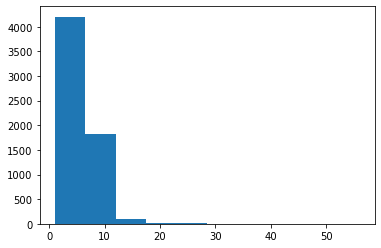

In [26]:
plt.hist(df_original.values.flatten())

The histogram is right skewed with a few outliers above 30.

**Part E:** Create a single figure with a series of box plots (4 side-by-side boxes) of the employment data grouped by each region.

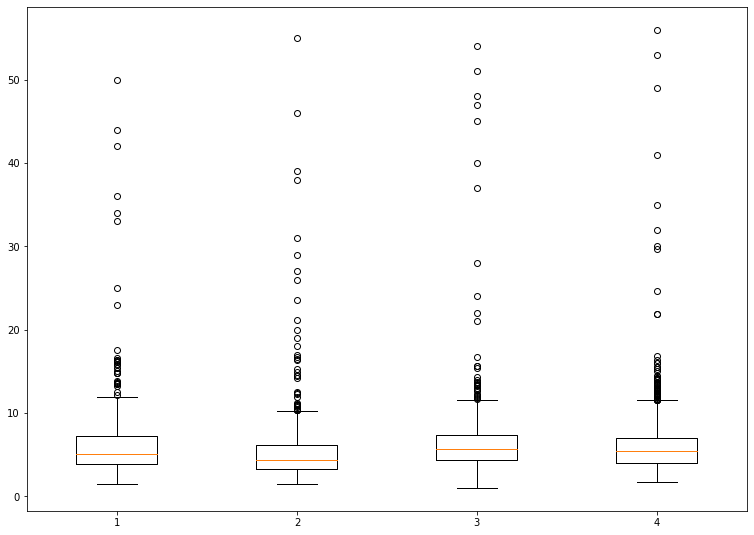

Northeast: 1
Midwest: 2
South: 3
West: 4


In [27]:
Northeast=df.loc[df["Region"]==1] #seperate northeast
del Northeast ['Region'] #remove columns that do not need to be graphed
del Northeast ["State"]

Midwest=df.loc[df["Region"]==2] #seperate midwest
del Midwest ['Region'] #remove columns that do not need to be graphed
del Midwest ["State"]

South=df.loc[df["Region"]==3] #seperate South
del South ['Region'] #remove columns that do not need to be graphed
del South ["State"]

West=df.loc[df["Region"]==4] #seperate West
del West ['Region'] #remove columns that do not need to be graphed
del West ["State"]


data_1 = Northeast.values.flatten()
data_2 = Midwest.values.flatten()
data_3 = South.values.flatten()
data_4 = West.values.flatten()
data = [data_1, data_2, data_3, data_4]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])

plt.boxplot(data)
plt.show()

print('Northeast: 1')
print('Midwest: 2')
print('South: 3')
print('West: 4')

**Part F:** Create a new data frame with 12 columns that groups all of the data according to month of the year.  You can combine all the locations into a single column for each month.  

(*Hint*: Every 12th data column should be from the same month.)

Then create a single figure with a series of box plots (12 side-by-side boxes) of the employment data grouped by each month.


<bound method NDFrame.head of    Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
0  462  449  432  403  405  431  426  415  400  388  377  383
1  413  407  390  358  364  389  392  374  347  345  339  355
2  401  380  359  333  337  363  355  339  323  322  309  305
3  336  336  323  278  287  299  307  294  271  260  263  257
4  296  284  271  247  257  267  266  248  233  231  232  234
5  261  258  252  230  223  250  247  240  229  222  212  219
6  253  243  224  201  200  220  221  217  195  186  191  193
7  224  219  206  183  175  206  200  191  173  172  170  182
8  221  204  197  167  168  191  195  184  162  163  163  166
9  200  191  222  693  601  505  472  388  352  302  296  301>


<AxesSubplot:>

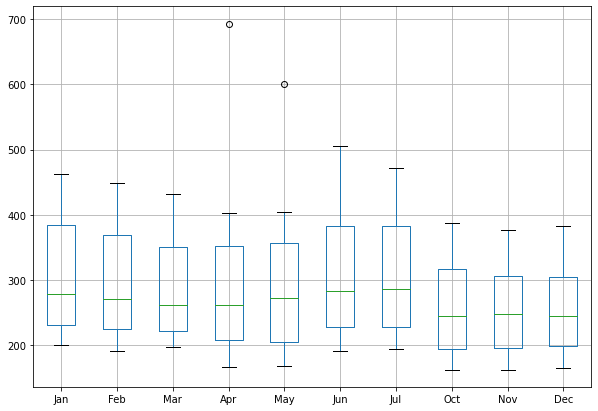

In [28]:
df_months = pd.DataFrame()

Jan1=[0] * 10 #create empty list for month
Feb1=[0] * 10
Mar1=[0] * 10 
Apr1=[0] * 10 
May1=[0] * 10
Jun1=[0] * 10
Jul1=[0] * 10
Aug1=[0] * 10
Sep1=[0] * 10
Oct1=[0] * 10 
Nov1=[0] * 10
Dec1=[0] * 10 
df_months = df_months.assign(Jan=Jan1) #add empty columns to database
df_months = df_months.assign(Feb=Feb1)
df_months = df_months.assign(Mar=Mar1)
df_months = df_months.assign(Apr=Apr1)
df_months = df_months.assign(May=May1)
df_months = df_months.assign(Jun=Jun1)
df_months = df_months.assign(Jul=Jul1)
df_months = df_months.assign(Aug=Aug1)
df_months = df_months.assign(Sep=Sep1)
df_months = df_months.assign(Oct=Oct1)
df_months = df_months.assign(Nov=Nov1)
df_months = df_months.assign(Dec=Dec1)

sum1=df_original.sum(axis=0) #sum up columns 
j=0 #set j to 0
for i in range(1, len(sum1), 12): #for length of sum of columns iterating by 12
    df_months['Jan'].values[j]=sum1[i] #add first to jan column 
    df_months['Feb'].values[j]=sum1[i+1] #add second to feb column 
    df_months['Mar'].values[j]=sum1[i+2]
    df_months['Apr'].values[j]=sum1[i+3]
    df_months['May'].values[j]=sum1[i+4]
    df_months['Jun'].values[j]=sum1[i+5]
    df_months['Jul'].values[j]=sum1[i+6]
    df_months['Aug'].values[j]=sum1[i+7]
    df_months['Sep'].values[j]=sum1[i+8]
    df_months['Oct'].values[j]=sum1[i+9]
    df_months['Nov'].values[j]=sum1[i+10]
    df_months['Dec'].values[j]=sum1[i+11]
    j=j+1 #iterate through j
print(df_months.head)

fig = plt.figure(figsize =(10, 7)) #make plot large enough to see
df_months.boxplot(column=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Oct', 'Nov', 'Dec']) 
#create boxplot with each column


**Part G:** Discuss the following:

1) Does there appear to be larger differences between different *regions* or between different *months*?  Explain fully.  Speculate as to *why* one factor might matter more than the other.

2) Are there any downsides to these kinds of groupings?  Can you think of anything that might make these types of comparisons more useful?


1) There seems to be larger differences between different months. There is more deviation in not only the means but in the quartiles as well.  I think this is becasue the time of year has a larger affect on the job market.  The regions are too large to have a noticeable affect on the data (the average of such a large region is similar to the average of the whole data)

2) A downside is that these groupings are very general.  Specifically, for the region breakdown, I think it would be helpful to look at one charatistic within each region.  An example of this could be age.